In [142]:
import os
import glob
import cv2
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

In [143]:
air125_path = '../AIR'
air400_path = '../AIR_400'
cohface_path = '../COHFACE'

In [144]:
def get_raw_data(data_path):
    """Get raw data directories."""
    subject_dirs = glob.glob(os.path.join(data_path, "S*"))
    if not subject_dirs:
        raise ValueError("AIR 125 data paths empty!")

    dirs = []
    for subject_dir in subject_dirs:
        # Extract subject ID (e.g., 'S01' -> 'S01')
        subject = os.path.basename(subject_dir)

        # Skip non-subject directories
        if not os.path.isdir(subject_dir) or not subject.startswith('S'):
            print(f"Skipping non-subject item: {subject}")
            continue

        # Get all MP4 files in the subject directory
        mp4_files = glob.glob(os.path.join(subject_dir, "*.mp4"))

        for mp4_file in mp4_files:
            # Extract recording ID (number without extension)
            recording_id = os.path.splitext(os.path.basename(mp4_file))[0]

            # Check if corresponding HDF5 file exists
            if data_path == air400_path:
                hdf5_file = os.path.join(subject_dir, "out", f"{recording_id}.hdf5")
            else:
                hdf5_file = os.path.join(subject_dir, f"{recording_id}.hdf5")
            if not os.path.exists(hdf5_file):
                print(f"Skipping {mp4_file}: No corresponding HDF5 file found")
                continue

            # Extract frame rate
            try:
                cap = cv2.VideoCapture(mp4_file)
                fs = int(round(cap.get(cv2.CAP_PROP_FPS)))
                frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
                duration = frame_count / fs
                width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
                height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
                cap.release()
            except Exception as e:
                print(f"Warning: Failed to read FPS for {mp4_file}: {e}")
                continue

            dirs.append({
                "index": f"{subject}_{int(recording_id):03d}",  # Unique identifier
                "subject": subject,  # Subject ID (e.g., 'S01')
                "video_path": mp4_file,  # Path to video file
                "label_path": hdf5_file,  # Path to label file
                "fs": fs,  # frame rate
                "num_frames": frame_count, # number of frames
                "duration": duration,  # duration in seconds
                "frame_size": (width, height)  # frame width * height
            })

    if not dirs:
        raise ValueError("No valid AIR 125 dataset files found!")

    return dirs

In [145]:
air125_data = get_raw_data(air125_path)
air125_df = pd.DataFrame(air125_data)
air125_df.sort_values(by=['index'], inplace=True)
air125_df

,index,subject,video_path,label_path,fs,num_frames,duration,frame_size
84,S01_001,S01,../AIR/S01/001.mp4,../AIR/S01/001.hdf5,15,900,60.0,"(1920.0, 1080.0)"
88,S01_002,S01,../AIR/S01/002.mp4,../AIR/S01/002.hdf5,15,900,60.0,"(1920.0, 1080.0)"
89,S01_003,S01,../AIR/S01/003.mp4,../AIR/S01/003.hdf5,15,900,60.0,"(1920.0, 1080.0)"
95,S01_004,S01,../AIR/S01/004.mp4,../AIR/S01/004.hdf5,15,900,60.0,"(1920.0, 1080.0)"
98,S01_005,S01,../AIR/S01/005.mp4,../AIR/S01/005.hdf5,15,900,60.0,"(1920.0, 1080.0)"
...,...,...,...,...,...,...,...,...
109,S08_002,S08,../AIR/S08/002.mp4,../AIR/S08/002.hdf5,30,1800,60.0,"(640.0, 360.0)"
110,S08_003,S08,../AIR/S08/003.mp4,../AIR/S08/003.hdf5,30,1800,60.0,"(640.0, 360.0)"
112,S08_004,S08,../AIR/S08/004.mp4,../AIR/S08/004.hdf5,30,1800,60.0,"(640.0, 360.0)"
113,S08_005,S08,../AIR/S08/005.mp4,../AIR/S08/005.hdf5,30,1800,60.0,"(640.0, 360.0)"


In [146]:
def three_sum(df, target=50):
    counts = df.groupby("subject").size()
    subjects = counts.index.tolist()
    count_vals = counts.values.tolist()
    n = len(subjects)
    rst = []
    for i in range(n):
        for j in range(i+1, n):
            for k in range(j+1, n):
                total = count_vals[i] + count_vals[j] + count_vals[k]
                if total == target:
                    rst.append((subjects[i], subjects[j], subjects[k]))
    return rst
print(three_sum(air125_df, target=50))

[('S01', 'S03', 'S06'), ('S01', 'S05', 'S06'), ('S02', 'S04', 'S06')]


In [147]:
air400_data = get_raw_data(air400_path)
air400_df = pd.DataFrame(air400_data)
air400_df.sort_values(by=['index'], inplace=True)
air400_df

Skipping ../AIR_400/S02/55.mp4: No corresponding HDF5 file found
Skipping ../AIR_400/S02/41.mp4: No corresponding HDF5 file found
Skipping ../AIR_400/S02/54.mp4: No corresponding HDF5 file found
Skipping ../AIR_400/S02/42.mp4: No corresponding HDF5 file found
Skipping ../AIR_400/S02/56.mp4: No corresponding HDF5 file found
Skipping ../AIR_400/S02/57.mp4: No corresponding HDF5 file found
Skipping ../AIR_400/S02/43.mp4: No corresponding HDF5 file found
Skipping ../AIR_400/S02/47.mp4: No corresponding HDF5 file found
Skipping ../AIR_400/S02/53.mp4: No corresponding HDF5 file found
Skipping ../AIR_400/S02/52.mp4: No corresponding HDF5 file found
Skipping ../AIR_400/S02/46.mp4: No corresponding HDF5 file found
Skipping ../AIR_400/S02/50.mp4: No corresponding HDF5 file found
Skipping ../AIR_400/S02/44.mp4: No corresponding HDF5 file found
Skipping ../AIR_400/S02/45.mp4: No corresponding HDF5 file found
Skipping ../AIR_400/S02/51.mp4: No corresponding HDF5 file found
Skipping ../AIR_400/S02/6

,index,subject,video_path,label_path,fs,num_frames,duration,frame_size
144,S01_001,S01,../AIR_400/S01/1.mp4,../AIR_400/S01/out/1.hdf5,10,609,60.9,"(1920.0, 1080.0)"
145,S01_002,S01,../AIR_400/S01/2.mp4,../AIR_400/S01/out/2.hdf5,10,609,60.9,"(1920.0, 1080.0)"
146,S01_003,S01,../AIR_400/S01/3.mp4,../AIR_400/S01/out/3.hdf5,10,600,60.0,"(1920.0, 1080.0)"
142,S01_004,S01,../AIR_400/S01/4.mp4,../AIR_400/S01/out/4.hdf5,10,609,60.9,"(1920.0, 1080.0)"
143,S01_005,S01,../AIR_400/S01/5.mp4,../AIR_400/S01/out/5.hdf5,10,609,60.9,"(1920.0, 1080.0)"
...,...,...,...,...,...,...,...,...
131,S10_016,S10,../AIR_400/S10/16.mp4,../AIR_400/S10/out/16.hdf5,10,608,60.8,"(1920.0, 1080.0)"
130,S10_017,S10,../AIR_400/S10/17.mp4,../AIR_400/S10/out/17.hdf5,10,608,60.8,"(1920.0, 1080.0)"
128,S10_018,S10,../AIR_400/S10/18.mp4,../AIR_400/S10/out/18.hdf5,10,608,60.8,"(1920.0, 1080.0)"
129,S10_019,S10,../AIR_400/S10/19.mp4,../AIR_400/S10/out/19.hdf5,10,608,60.8,"(1920.0, 1080.0)"


In [148]:
air125_df['dataset'] = 'AIR_125'
air400_df['dataset'] = 'AIR_400'
combined_df = pd.concat([air125_df, air400_df], ignore_index=True)
combined_df

,index,subject,video_path,label_path,fs,num_frames,duration,frame_size,dataset
0,S01_001,S01,../AIR/S01/001.mp4,../AIR/S01/001.hdf5,15,900,60.0,"(1920.0, 1080.0)",AIR_125
1,S01_002,S01,../AIR/S01/002.mp4,../AIR/S01/002.hdf5,15,900,60.0,"(1920.0, 1080.0)",AIR_125
2,S01_003,S01,../AIR/S01/003.mp4,../AIR/S01/003.hdf5,15,900,60.0,"(1920.0, 1080.0)",AIR_125
3,S01_004,S01,../AIR/S01/004.mp4,../AIR/S01/004.hdf5,15,900,60.0,"(1920.0, 1080.0)",AIR_125
4,S01_005,S01,../AIR/S01/005.mp4,../AIR/S01/005.hdf5,15,900,60.0,"(1920.0, 1080.0)",AIR_125
...,...,...,...,...,...,...,...,...,...
395,S10_016,S10,../AIR_400/S10/16.mp4,../AIR_400/S10/out/16.hdf5,10,608,60.8,"(1920.0, 1080.0)",AIR_400
396,S10_017,S10,../AIR_400/S10/17.mp4,../AIR_400/S10/out/17.hdf5,10,608,60.8,"(1920.0, 1080.0)",AIR_400
397,S10_018,S10,../AIR_400/S10/18.mp4,../AIR_400/S10/out/18.hdf5,10,608,60.8,"(1920.0, 1080.0)",AIR_400
398,S10_019,S10,../AIR_400/S10/19.mp4,../AIR_400/S10/out/19.hdf5,10,608,60.8,"(1920.0, 1080.0)",AIR_400


In [149]:
cmap = plt.get_cmap("Pastel1")

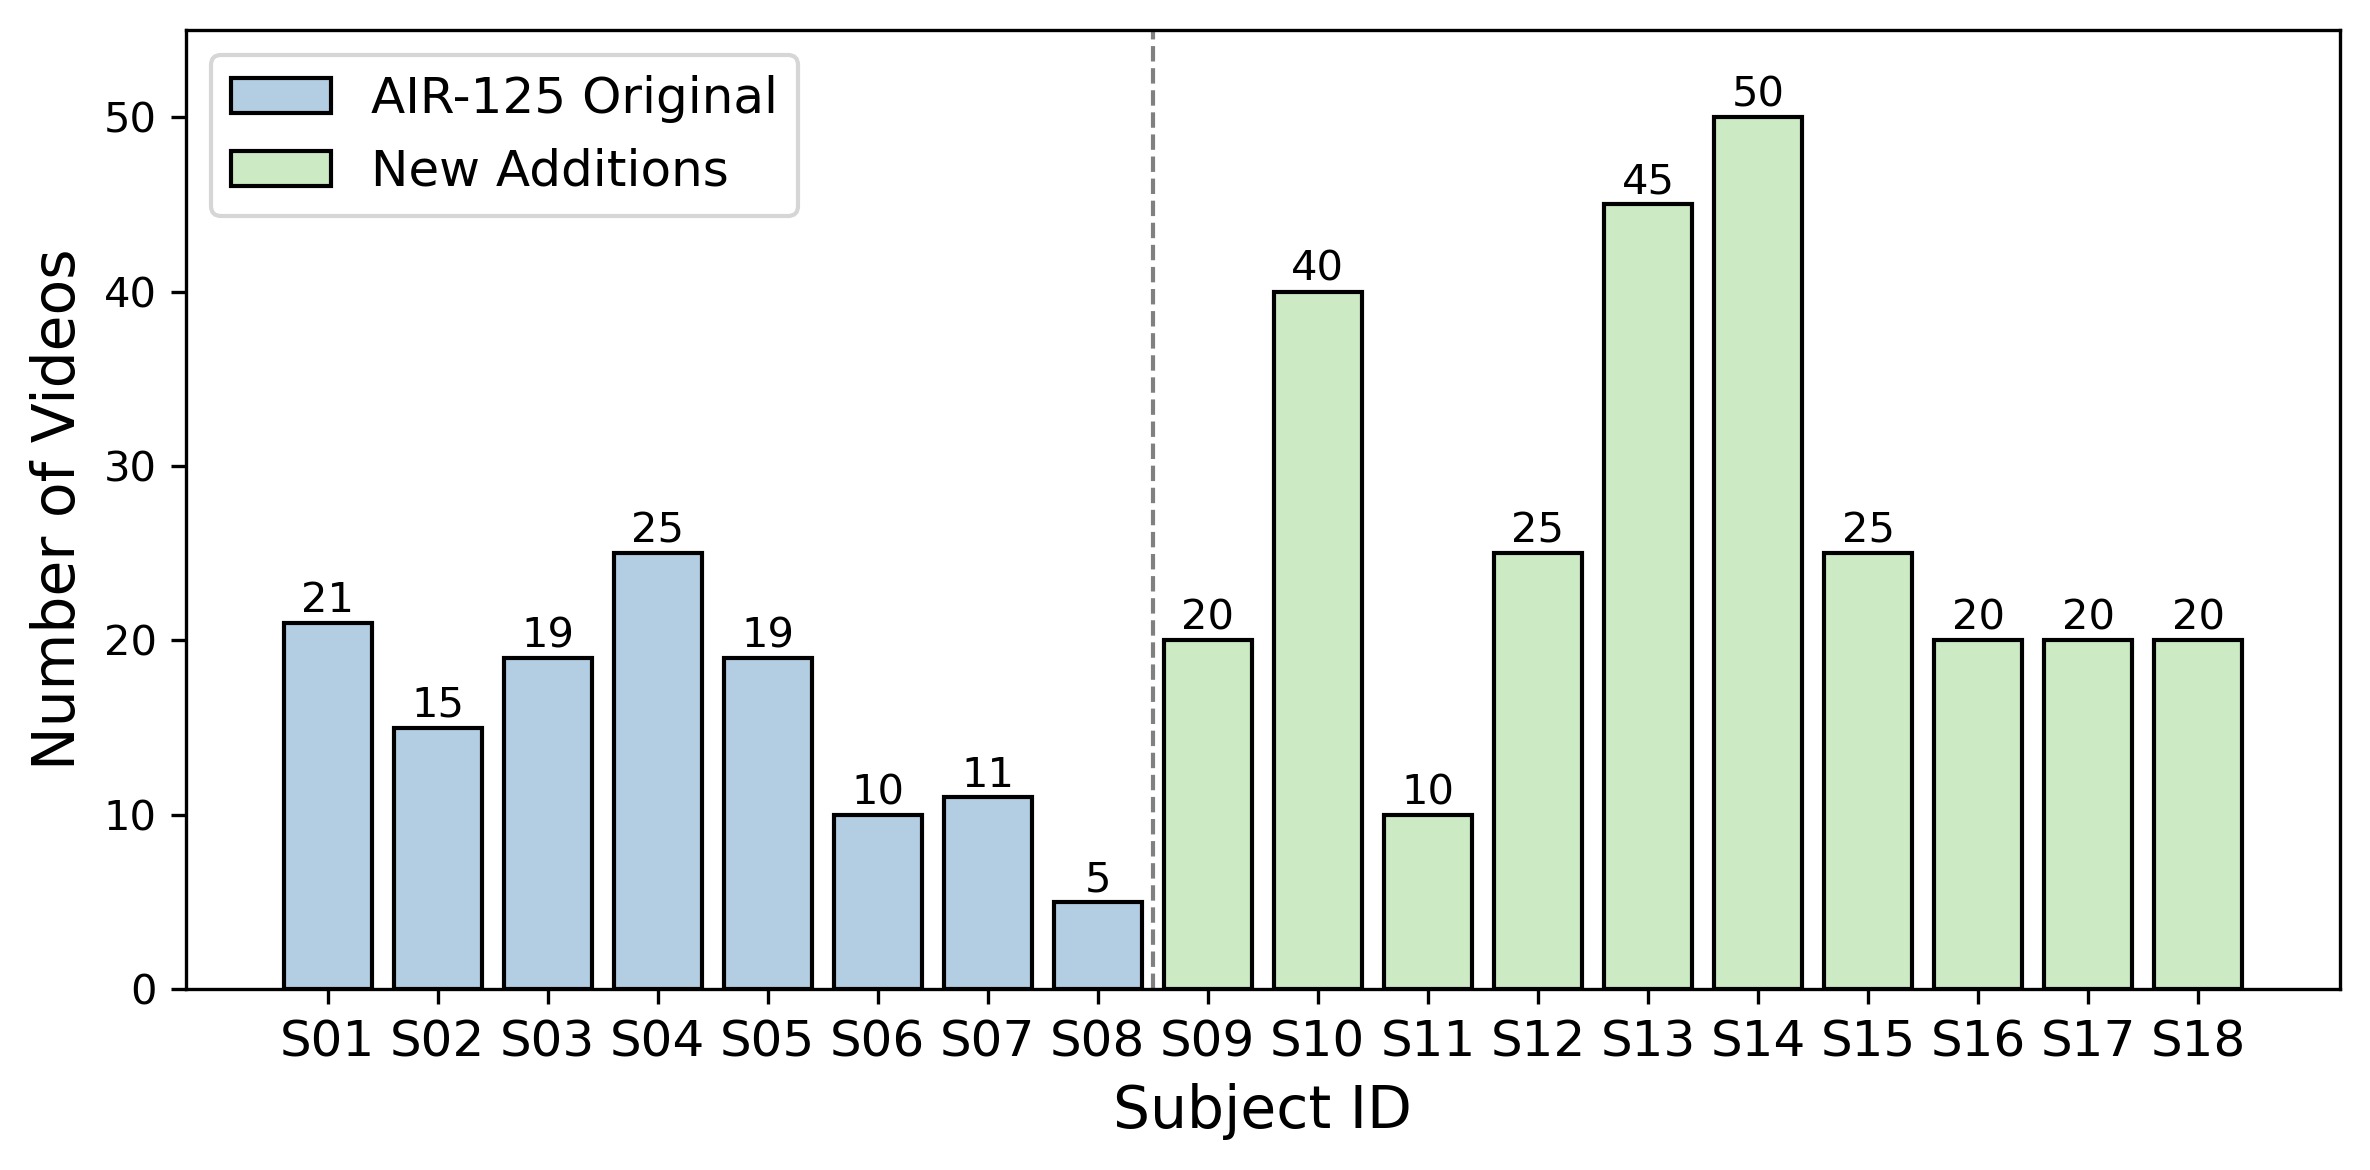

In [150]:
plt.figure(figsize=(8, 4), dpi=300)
counts = combined_df[['subject', 'dataset']].value_counts().reset_index(name='count')
counts = counts.sort_values(by=['dataset', 'subject'])  # AIR_125 bars left, AIR_400 right
dataset_colors = {
    'AIR_125': cmap(1),
    'AIR_400': cmap(2)
}
colors = [dataset_colors[ds] for ds in counts['dataset']]

bars = plt.bar(range(len(counts)), counts['count'], color=colors, edgecolor='black')

# Label each bar with count
for i, (bar, count) in enumerate(zip(bars, counts['count'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, str(count),
             ha='center', va='bottom', fontsize=10)

# X-tick labels and formatting
plt.xticks(range(len(counts)), list(counts['subject'][:8]) + [f"S{i:02d}" for i in range(9, 19)], rotation=0, fontsize=12)

# Split datasets
split_idx = counts['dataset'].value_counts().sort_index().iloc[0]
plt.axvline(x=split_idx - 0.5, color='gray', linestyle='--', linewidth=1)

# Legends
legend_elements = [Patch(facecolor=dataset_colors[k], edgecolor='black', label='AIR-125 Original' if k=='AIR_125' else 'New Additions') for k in dataset_colors]
plt.legend(handles=legend_elements, loc='upper left', fontsize=12)

plt.xlabel("Subject ID", fontsize=14)
plt.ylabel("Number of Videos", fontsize=14)
plt.ylim(0, 55)
plt.tight_layout()
plt.show()


In [151]:
def calculate_bpm_from_hdf5(hdf5_path):
    try:
        with h5py.File(hdf5_path, 'r') as f:
            keys = list(f.keys())

            if 'respiration' in keys:
                resp_data = f['respiration'][:]
                from scipy.signal import find_peaks
                peaks, properties = find_peaks(
                    resp_data,
                    height=np.mean(resp_data) * 0.3,
                    distance=15,
                    prominence=np.std(resp_data) * 0.2
                )
                if len(peaks) > 0:
                    return len(peaks)

            elif 'impulse' in keys:
                impulse_data = f['impulse'][:]
                peaks = np.where(impulse_data > 0.5)[0]
                if len(peaks) > 0:
                    return len(peaks)

    except Exception as e:
        print(f"Error reading {hdf5_path}: {e}")
    return None

In [152]:
import h5py

for i, row in combined_df.iterrows():
    bpm = calculate_bpm_from_hdf5(row['label_path'])
    combined_df.loc[i, 'bpm'] = bpm
    color_mode = "RGB" if row['fs'] >= 15 else "IR"
    combined_df.loc[i, 'color_mode'] = color_mode
combined_df

,index,subject,video_path,label_path,fs,num_frames,duration,frame_size,dataset,bpm,color_mode
0,S01_001,S01,../AIR/S01/001.mp4,../AIR/S01/001.hdf5,15,900,60.0,"(1920.0, 1080.0)",AIR_125,24.0,RGB
1,S01_002,S01,../AIR/S01/002.mp4,../AIR/S01/002.hdf5,15,900,60.0,"(1920.0, 1080.0)",AIR_125,22.0,RGB
2,S01_003,S01,../AIR/S01/003.mp4,../AIR/S01/003.hdf5,15,900,60.0,"(1920.0, 1080.0)",AIR_125,21.0,RGB
3,S01_004,S01,../AIR/S01/004.mp4,../AIR/S01/004.hdf5,15,900,60.0,"(1920.0, 1080.0)",AIR_125,21.0,RGB
4,S01_005,S01,../AIR/S01/005.mp4,../AIR/S01/005.hdf5,15,900,60.0,"(1920.0, 1080.0)",AIR_125,22.0,RGB
...,...,...,...,...,...,...,...,...,...,...,...
395,S10_016,S10,../AIR_400/S10/16.mp4,../AIR_400/S10/out/16.hdf5,10,608,60.8,"(1920.0, 1080.0)",AIR_400,20.0,IR
396,S10_017,S10,../AIR_400/S10/17.mp4,../AIR_400/S10/out/17.hdf5,10,608,60.8,"(1920.0, 1080.0)",AIR_400,22.0,IR
397,S10_018,S10,../AIR_400/S10/18.mp4,../AIR_400/S10/out/18.hdf5,10,608,60.8,"(1920.0, 1080.0)",AIR_400,22.0,IR
398,S10_019,S10,../AIR_400/S10/19.mp4,../AIR_400/S10/out/19.hdf5,10,608,60.8,"(1920.0, 1080.0)",AIR_400,21.0,IR


In [153]:
from collections import defaultdict

# FS data
air125_fs = combined_df[combined_df['dataset'] == 'AIR_125']['fs'].to_list()
air125_fs_count = defaultdict(int)
for fs in air125_fs:
    air125_fs_count[fs] += 1

print(f'air125_fs_count:\n{air125_fs_count}')

new_fs = combined_df[combined_df['dataset'] == 'AIR_400']['fs'].to_list()
new_fs_count = defaultdict(int)
for fs in new_fs:
    new_fs_count[fs] += 1
print(f'new_fs_count:\n{new_fs_count}')

air400_fs = combined_df['fs'].to_list()
air400_fs_count = defaultdict(int)
for fs in air400_fs:
    air400_fs_count[fs] += 1
print(f'air400_fs_count:\n{air400_fs_count}')



air125_fs_count:
defaultdict(<class 'int'>, {15: 25, 10: 74, 30: 26})
new_fs_count:
defaultdict(<class 'int'>, {10: 250, 15: 25})
air400_fs_count:
defaultdict(<class 'int'>, {15: 50, 10: 324, 30: 26})


In [154]:
# Color data
air125_color = combined_df[combined_df['dataset'] == 'AIR_125']['color_mode'].to_list()
air125_color_count = defaultdict(int)
for color in air125_color:
    air125_color_count[color] += 1

print(f'air125_color_count:\n{air125_color_count}')

new_color = combined_df[combined_df['dataset'] == 'AIR_400']['color_mode'].to_list()
new_color_count = defaultdict(int)
for color in new_color:
    new_color_count[color] += 1
print(f'new_color_count:\n{new_color_count}')

air400_color = combined_df['color_mode'].to_list()
air400_color_count = defaultdict(int)
for color in air400_color:
    air400_color_count[color] += 1
print(f'air400_color_count:\n{air400_color_count}')

air125_color_count:
defaultdict(<class 'int'>, {'RGB': 51, 'IR': 74})
new_color_count:
defaultdict(<class 'int'>, {'IR': 250, 'RGB': 25})
air400_color_count:
defaultdict(<class 'int'>, {'RGB': 76, 'IR': 324})


In [155]:
air125_pos_count = {
    'Prone': 29,
    'Side': 50,
    'Supine': 46
}

new_pos_count = {
    'Prone': 0,
    'Side': 75,
    'Supine': 200
}

air400_pos_count = {
    'Prone': air125_pos_count['Prone'] + new_pos_count['Prone'],
    'Side': air125_pos_count['Side'] + new_pos_count['Side'],
    'Supine': air125_pos_count['Supine'] + new_pos_count['Supine']
}
print(f"air400_pos_count:\n{air400_pos_count}")

air400_pos_count:
{'Prone': 29, 'Side': 125, 'Supine': 246}


In [182]:
frame_colors = {10: cmap(0), 15: cmap(1), 30: cmap(2)}
mode_colors  = {"IR": cmap(3), "RGB": cmap(4)}
sleep_colors = {"Supine": cmap(1), "Side": cmap(5), "Prone": cmap(7)}

In [234]:
def ring_chart(ax, counts, title, colors, fps=False):
    labels = list(counts.keys())
    values = list(counts.values())
    wedges, _ = ax.pie(
        values, labels=None, startangle=90,
        colors=[colors[i] for i in labels], wedgeprops=dict(width=0.35, edgecolor='white')
    )
    # title inside the ring
    total = sum(values)
    ax.text(0, 0, f"{title}", ha="center", va="center", fontsize=12)
    for w, lab, val in zip(wedges, labels, values):
        if val <= 0:
            continue
        pct = 100.0 * val / total
        ang = (w.theta2 + w.theta1) / 2.0
        x, y = np.cos(np.deg2rad(ang)), np.sin(np.deg2rad(ang))
        # label text
        txt = f"{lab}\n{pct:.0f}% (n={int(val)})" if not fps else f"{lab} FPS\n{pct:.0f}% (n={int(val)})"
        if pct >= 10:
            # place inside
            ax.text(0.95 * x, 0.9 * y, txt, ha="center", va="center", fontsize=9, alpha=0.8)
        else:
            # place outside with a connector
            ax.text(1.25 * x, 1.25 * y, txt, ha="center", va="center", fontsize=9, alpha=0.8)
            ax.plot([0.85 * x, 1.02 * x], [0.85 * y, 1.02 * y], color="0.5", lw=0.8)

def hist_chart(rr, ax, color):
    # Respiration histogram
    ax.hist(rr, bins=np.arange(10,46,2), color=color, edgecolor="white")
    ax.set_title("Respiration Rate", fontsize=12)
    ax.set_xlabel("BPM", fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.text(0.98, 0.98, rf"$\mu={np.mean(rr):.1f}$"+"\n"+rf"$\sigma={np.std(rr):.1f}$"+"\n"+rf"$n={len(rr)}$",
            ha="right", va="top", transform=ax.transAxes, fontsize=12, color="0.3")
    ax.set_ylim(0, 140)


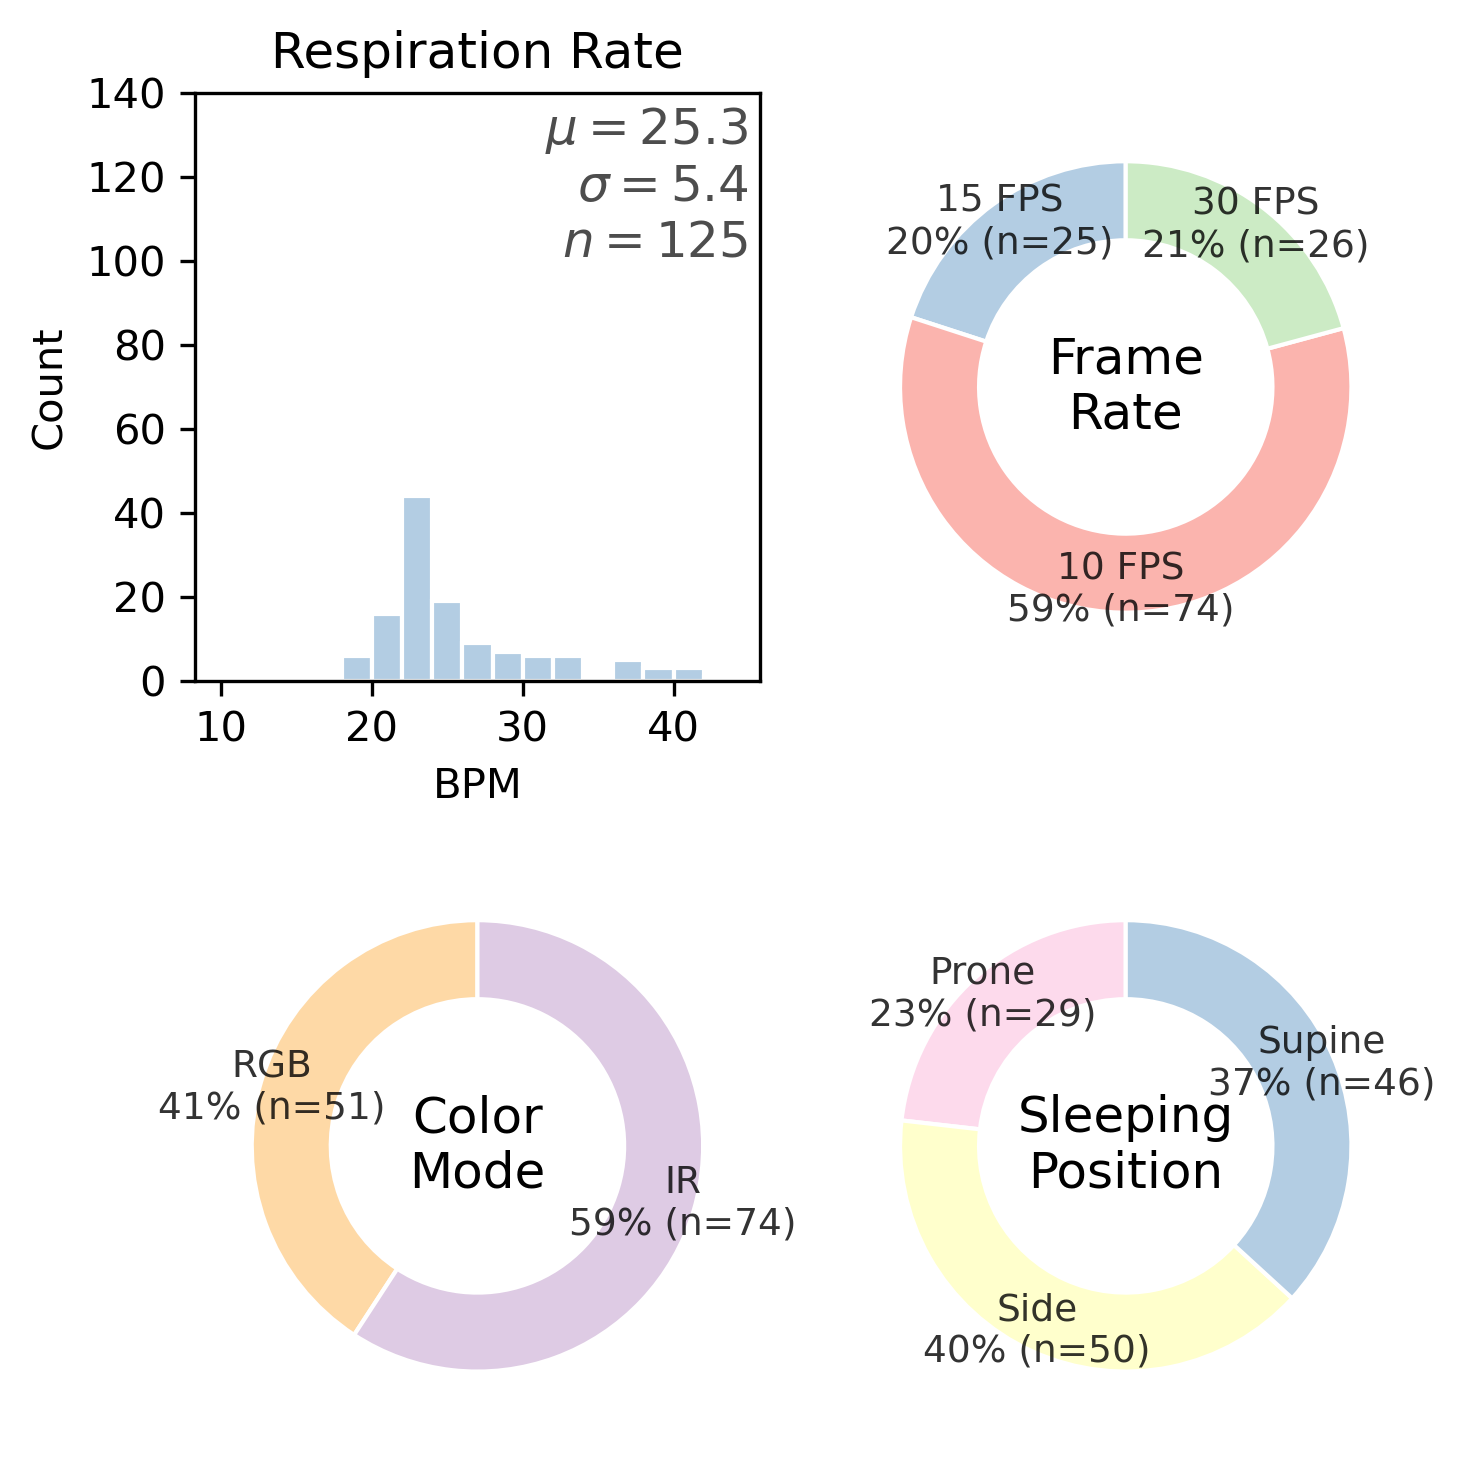

In [235]:
fig, axs = plt.subplots(2, 2, figsize=(5,5), dpi=300)
hist_chart(combined_df[combined_df["dataset"] == "AIR_125"]["bpm"], axs[0,0], color=cmap(1))
ring_chart(axs[0,1], air125_fs_count, "Frame\nRate", colors=frame_colors, fps=True)
ring_chart(axs[1,0], air125_color_count, "Color\nMode", colors=mode_colors)
ring_chart(axs[1,1], air125_pos_count, "Sleeping\nPosition", colors=sleep_colors)
plt.tight_layout()
plt.savefig("results/air_125_char.png", dpi=300)
plt.show()

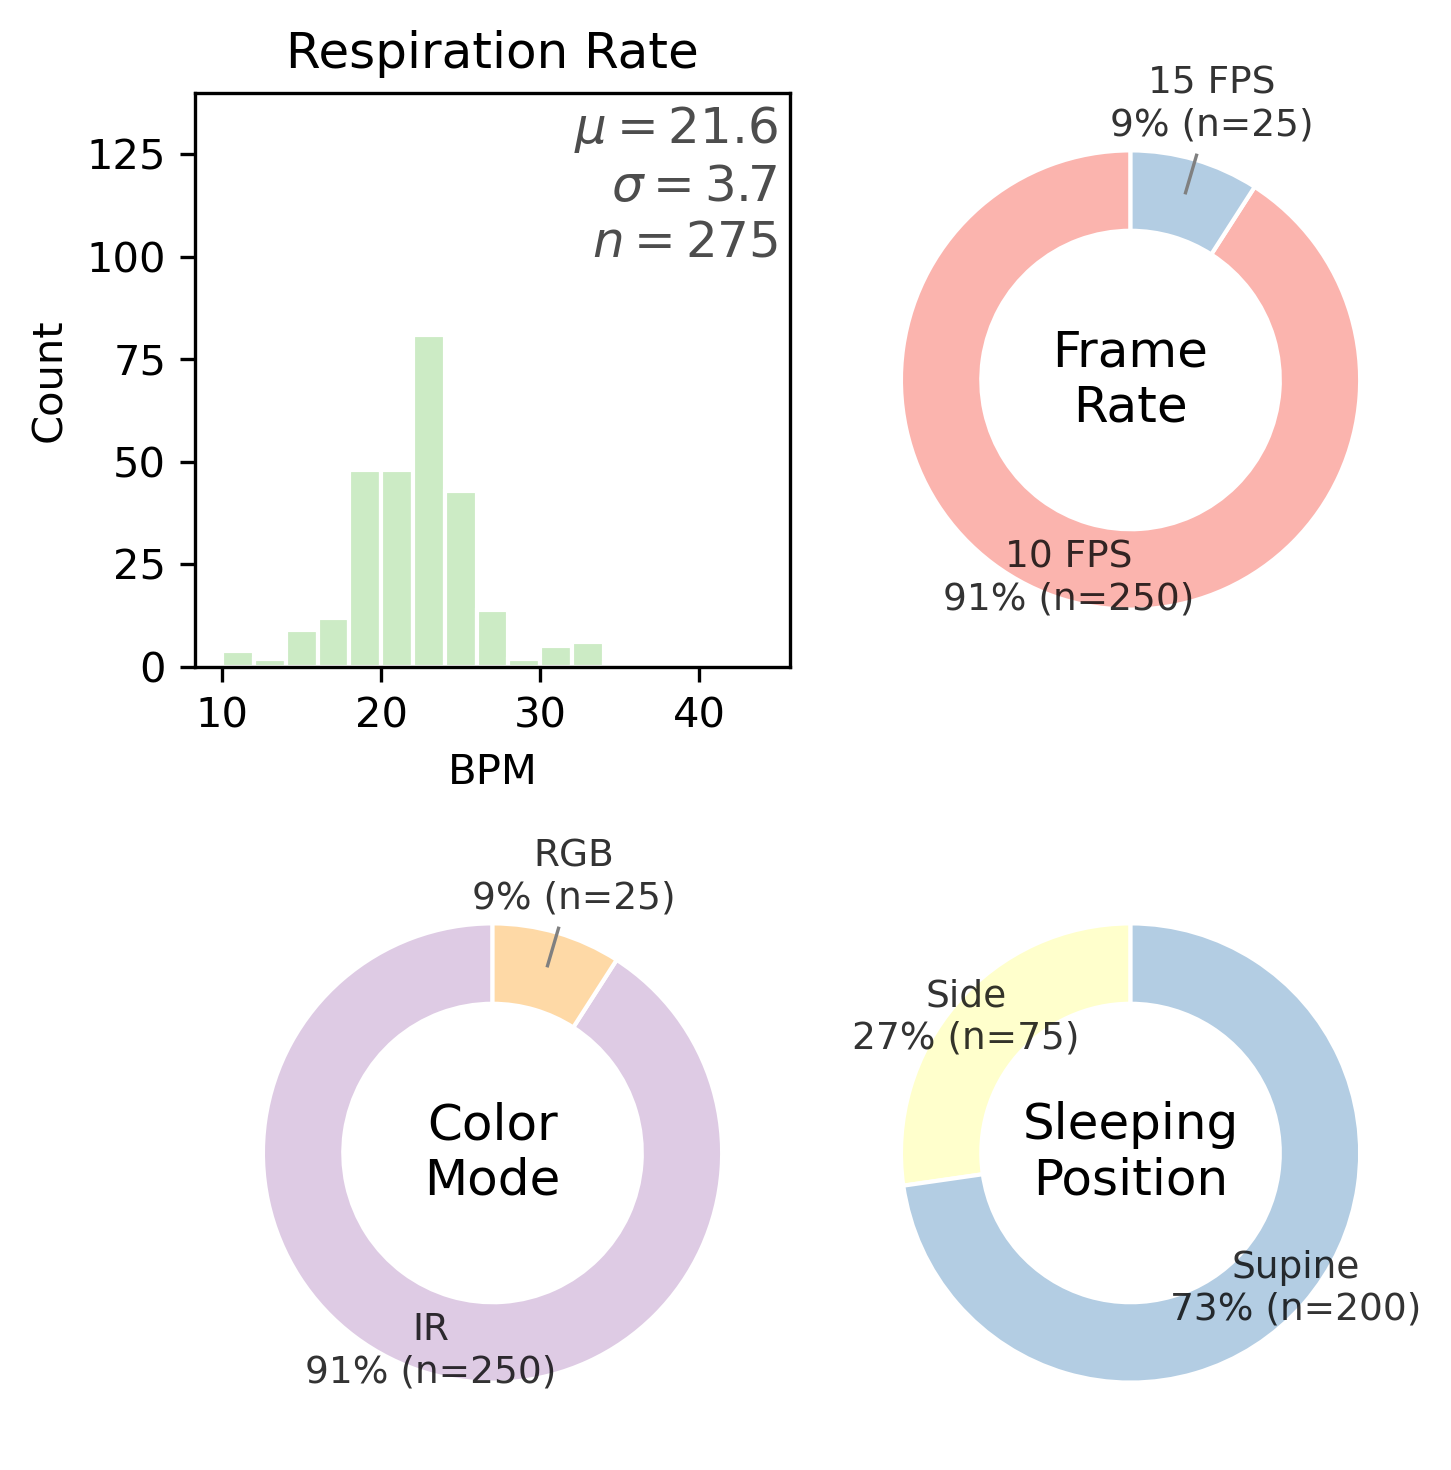

In [236]:
fig, axs = plt.subplots(2, 2, figsize=(5,5), dpi=300)
hist_chart(combined_df[combined_df["dataset"] == "AIR_400"]["bpm"], axs[0,0], color=cmap(2))
ring_chart(axs[0,1], new_fs_count, "Frame\nRate", colors=frame_colors, fps=True)
ring_chart(axs[1,0], new_color_count, "Color\nMode", colors=mode_colors)
ring_chart(axs[1,1], new_pos_count, "Sleeping\nPosition", colors=sleep_colors)
plt.tight_layout()
plt.savefig("results/new_char.png", dpi=300)
plt.show()

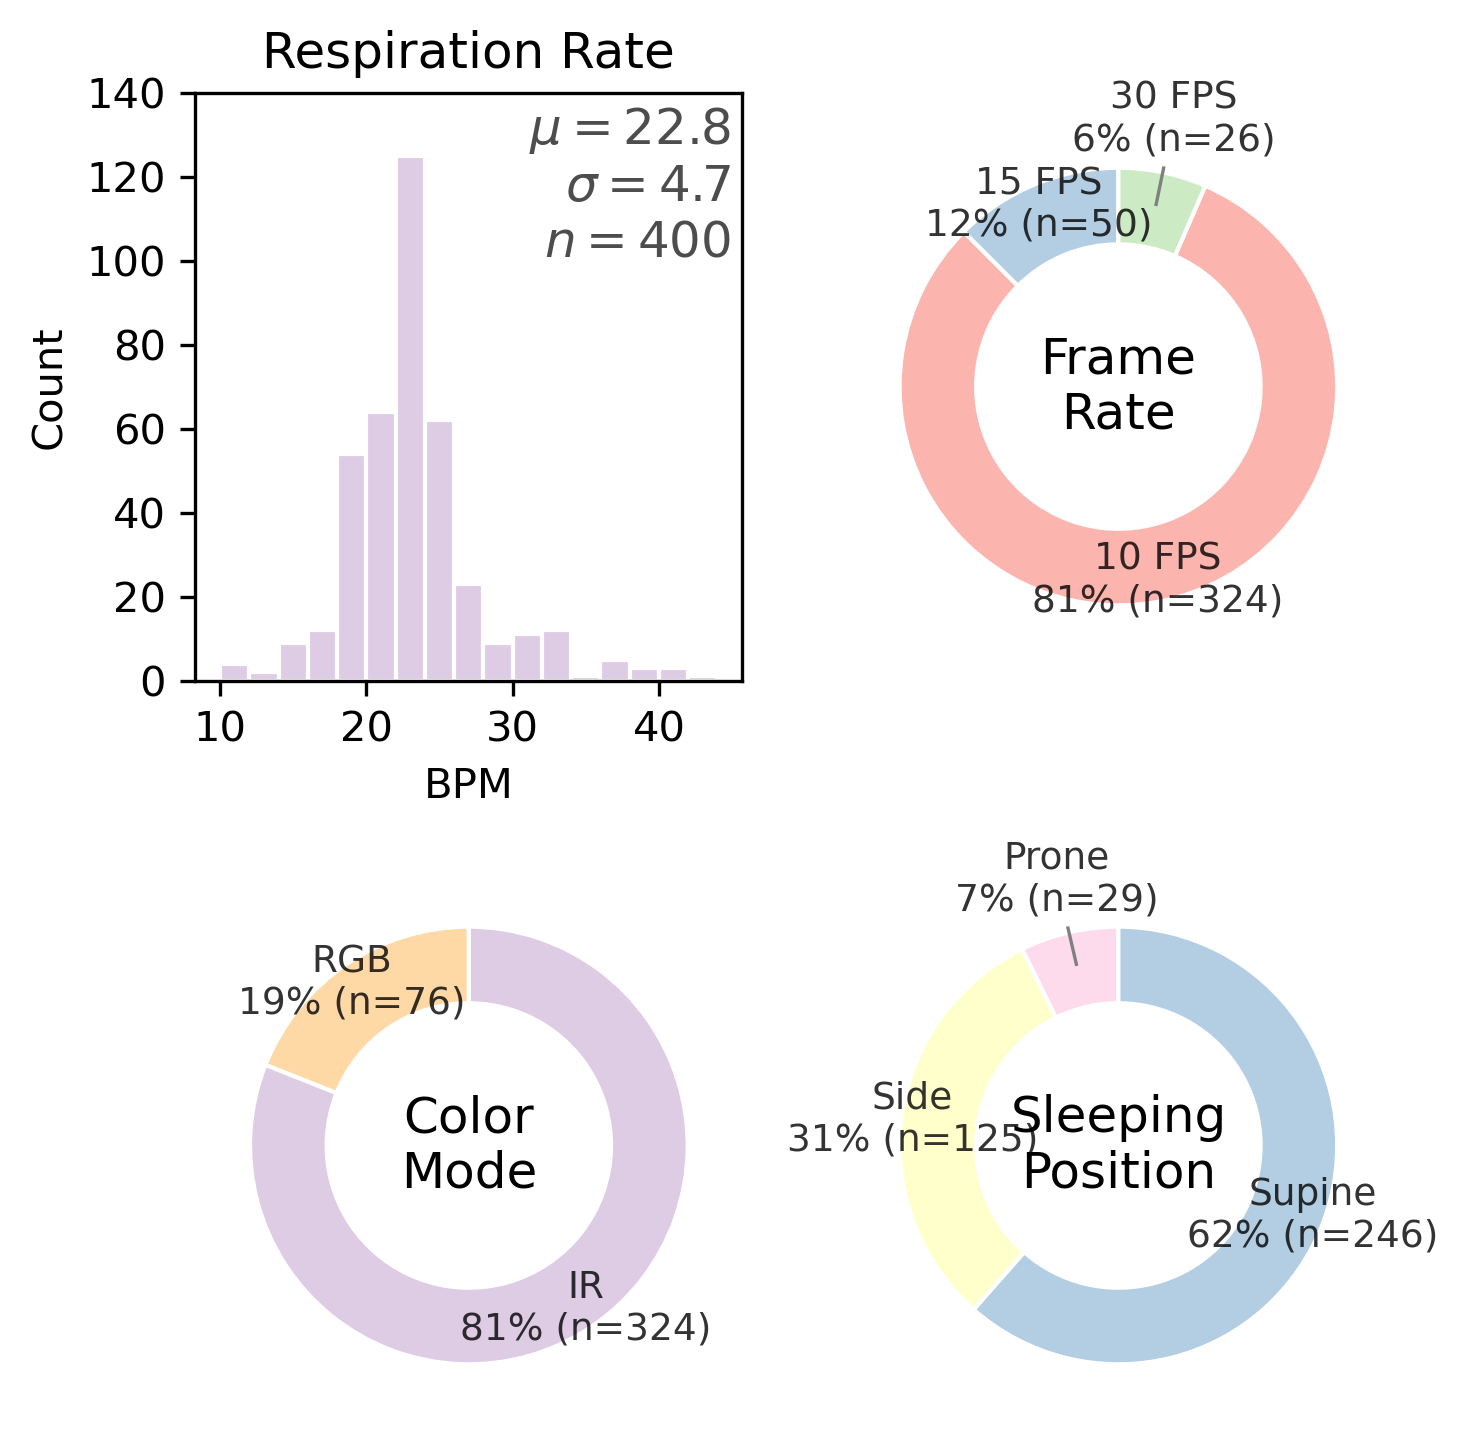

In [237]:
fig, axs = plt.subplots(2, 2, figsize=(5,5), dpi=300)
hist_chart(combined_df["bpm"], axs[0,0], color=cmap(3))
ring_chart(axs[0,1], air400_fs_count, "Frame\nRate", colors=frame_colors, fps=True)
ring_chart(axs[1,0], air400_color_count, "Color\nMode", colors=mode_colors)
ring_chart(axs[1,1], air400_pos_count, "Sleeping\nPosition", colors=sleep_colors)
plt.tight_layout()
plt.savefig("results/air400_char.png", dpi=300)
plt.show()

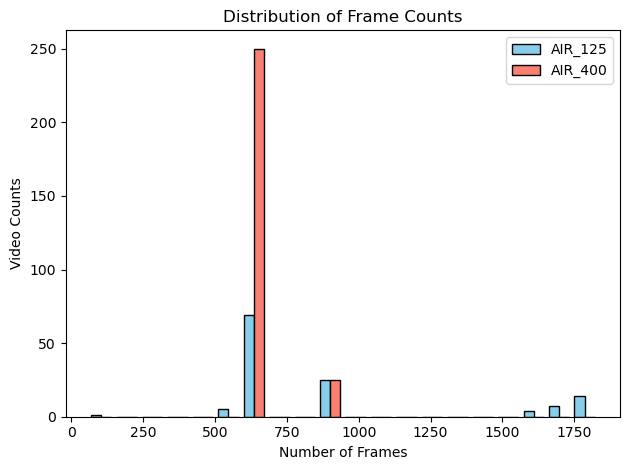

In [106]:
air125_frames = combined_df[combined_df['dataset'] == 'AIR_125']['num_frames']
air400_frames = combined_df[combined_df['dataset'] == 'AIR_400']['num_frames']

plt.hist([air125_frames, air400_frames], bins=20, color=['skyblue', 'salmon'], edgecolor='black', label=['AIR_125', 'AIR_400'])

plt.xlabel("Number of Frames")
plt.ylabel("Video Counts")
plt.title("Distribution of Frame Counts")
plt.legend()
plt.tight_layout()
plt.show()

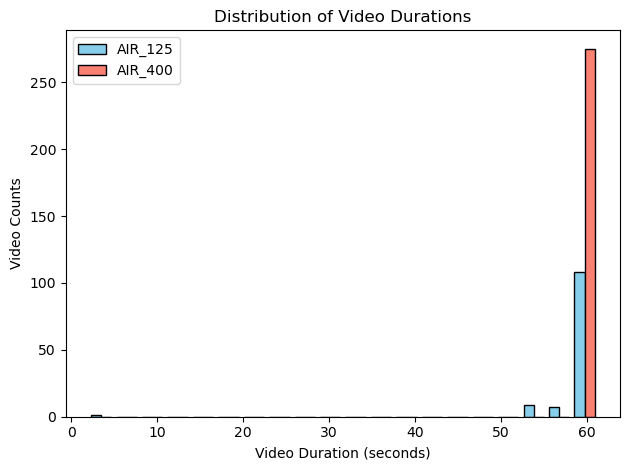

In [107]:
air125_duration = combined_df[combined_df['dataset'] == 'AIR_125']['duration']
air400_duration = combined_df[combined_df['dataset'] == 'AIR_400']['duration']

plt.hist([air125_duration, air400_duration], bins=20, color=['skyblue', 'salmon'], edgecolor='black', label=['AIR_125', 'AIR_400'])

plt.xlabel("Video Duration (seconds)")
plt.ylabel("Video Counts")
plt.title("Distribution of Video Durations")
plt.legend()
plt.tight_layout()
plt.show()

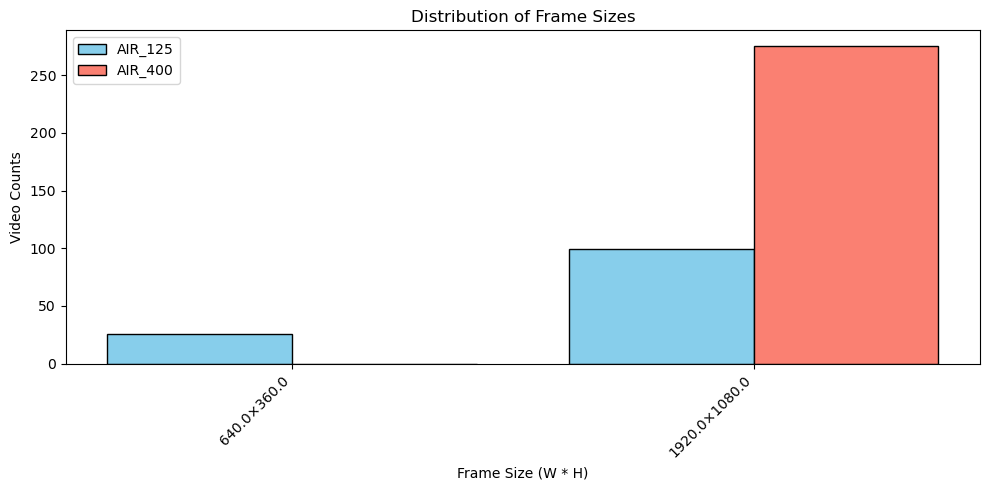

In [111]:
size_counts = combined_df.groupby(['dataset','frame_size']).size().reset_index(name='count')

air125_size_counts = size_counts[size_counts['dataset'] == 'AIR_125']
air400_size_counts = size_counts[size_counts['dataset'] == 'AIR_400']

all_sizes = sorted(combined_df['frame_size'].unique())

x = range(len(all_sizes))
width = 0.4

plt.figure(figsize=(10,5))
plt.bar(
    [i - width/2 for i in x],
    [air125_size_counts.set_index('frame_size').reindex(all_sizes)['count'].fillna(0) for _ in [0]][0],
    width=width,
    label='AIR_125',
    color='skyblue',
    edgecolor='black'
)
plt.bar(
    [i + width/2 for i in x],
    [air400_size_counts.set_index('frame_size').reindex(all_sizes)['count'].fillna(0) for _ in [0]][0],
    width=width,
    label='AIR_400',
    color='salmon',
    edgecolor='black'
)

plt.xticks(x, [f"{w}×{h}" for (w,h) in all_sizes], rotation=45, ha='right')

plt.xlabel("Frame Size (W * H)")
plt.ylabel("Video Counts")
plt.title("Distribution of Frame Sizes")
plt.legend()
plt.tight_layout()
plt.show()

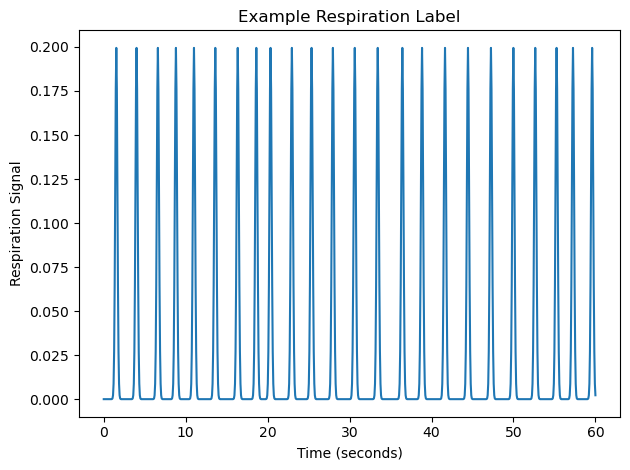

In [12]:
import numpy as np
import h5py

def plot_label_sample(hdf5_path, fs):
    with h5py.File(hdf5_path, 'r') as f:
        signal = f['respiration'][:]
    t = np.linspace(0, len(signal)/fs, len(signal)) 
    plt.plot(t, signal)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Respiration Signal")
    plt.title("Example Respiration Label")
    plt.tight_layout()
    plt.show()

plot_label_sample(combined_df.iloc[0]['label_path'], combined_df.iloc[0]['fs'])

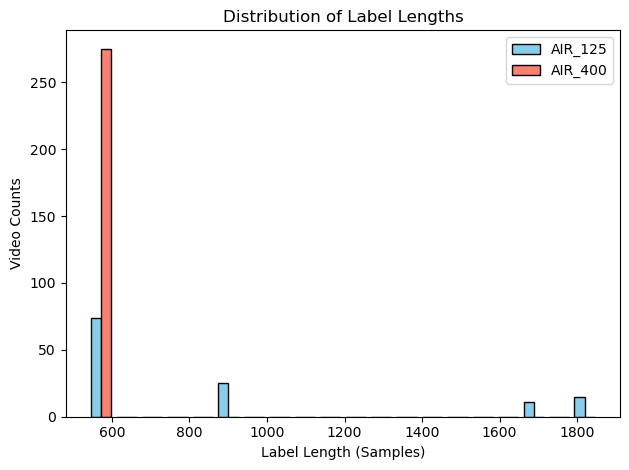

In [13]:
def get_signal_length(hdf5_path):
    with h5py.File(hdf5_path, 'r') as f:
        return len(f['respiration'][:])

combined_df['label_len'] = combined_df['label_path'].apply(get_signal_length)

air125_label_len = combined_df[combined_df['dataset'] == 'AIR_125']['label_len']
air400_label_len = combined_df[combined_df['dataset'] == 'AIR_400']['label_len']

plt.hist([air125_label_len, air400_label_len], bins=20, color=['skyblue', 'salmon'], edgecolor='black',
         label=['AIR_125', 'AIR_400'])
plt.xlabel("Label Length (Samples)")
plt.ylabel("Video Counts")
plt.title("Distribution of Label Lengths")
plt.legend()
plt.tight_layout()
plt.show()

In [87]:
mismatched = combined_df[combined_df['num_frames'] != combined_df['label_len']].copy()
mismatched['diff'] = mismatched['num_frames'] - mismatched['label_len']

mismatched_subjects = sorted(mismatched['index'].unique())
print("Subjects with mismatched num_frames and label_len:\n")
print(f"Counts:{len(mismatched_subjects)}\n")
print(f"Mismatched Frames:\n {mismatched_subjects}")

Subjects with mismatched num_frames and label_len:

Counts:292

Mismatched Frames:
 ['S01_1', 'S01_10', 'S01_11', 'S01_12', 'S01_13', 'S01_14', 'S01_15', 'S01_16', 'S01_17', 'S01_18', 'S01_19', 'S01_2', 'S01_20', 'S01_4', 'S01_5', 'S01_6', 'S01_7', 'S01_8', 'S01_9', 'S02_1', 'S02_10', 'S02_11', 'S02_12', 'S02_13', 'S02_14', 'S02_15', 'S02_16', 'S02_17', 'S02_18', 'S02_19', 'S02_2', 'S02_20', 'S02_21', 'S02_22', 'S02_23', 'S02_24', 'S02_25', 'S02_26', 'S02_27', 'S02_28', 'S02_29', 'S02_3', 'S02_30', 'S02_31', 'S02_32', 'S02_33', 'S02_34', 'S02_35', 'S02_36', 'S02_37', 'S02_38', 'S02_39', 'S02_4', 'S02_40', 'S02_5', 'S02_6', 'S02_7', 'S02_8', 'S02_9', 'S03_1', 'S03_10', 'S03_2', 'S03_3', 'S03_4', 'S03_5', 'S03_6', 'S03_7', 'S03_8', 'S03_9', 'S04_1', 'S04_10', 'S04_11', 'S04_12', 'S04_13', 'S04_14', 'S04_15', 'S04_16', 'S04_17', 'S04_18', 'S04_19', 'S04_2', 'S04_20', 'S04_21', 'S04_22', 'S04_23', 'S04_24', 'S04_25', 'S04_3', 'S04_4', 'S04_5', 'S04_6', 'S04_7', 'S04_8', 'S04_9', 'S05_1', '

In [92]:
total_counts = combined_df.groupby(['dataset', 'subject'])['index'].count().reset_index()
total_counts = total_counts.rename(columns={'index': 'total_count'})

mismatched_counts = mismatched.groupby(['dataset', 'subject'])['index'].count().reset_index()
mismatched_counts = mismatched_counts.rename(columns={'index': 'mismatched_count'})

merged = pd.merge(total_counts, mismatched_counts, on=['dataset', 'subject'], how='left')
merged['mismatched_count'] = merged['mismatched_count'].fillna(0).astype(int)
merged['mismatch_ratio'] = merged['mismatched_count'] / merged['total_count']

diff_stats = mismatched.groupby(['dataset', 'subject'])['diff'].agg(
    diff_min='min',
    diff_max='max'
).reset_index()
merged = pd.merge(merged, diff_stats, on=['dataset', 'subject'], how='left')
merged

,dataset,subject,total_count,mismatched_count,mismatch_ratio,diff_min,diff_max
0,AIR_125,S01,21,0,0.00,NaN,NaN
1,AIR_125,S02,15,0,0.00,NaN,NaN
2,AIR_125,S03,19,0,0.00,NaN,NaN
3,AIR_125,S04,25,0,0.00,NaN,NaN
4,AIR_125,S05,19,0,0.00,NaN,NaN
5,AIR_125,S06,10,3,0.30,-1792.0,-3.0
6,AIR_125,S07,11,11,1.00,-66.0,-4.0
7,AIR_125,S08,5,4,0.80,-22.0,9.0
8,AIR_400,S01,20,19,0.95,9.0,12.0
9,AIR_400,S02,40,40,1.00,8.0,10.0


In [89]:
mismatched['diff'] = mismatched['num_frames'] - mismatched['label_len']

print(f"Difference range (num_frames - label_len): {mismatched['diff'].min()} to {mismatched['diff'].max()}")

Difference range (num_frames - label_len): -1792 to 304


In [93]:
# from tqdm import tqdm
# 
# 
# def plot_label_with_video(hdf5_path, video_path, save_path, fs=None):
#     # Load respiration signal
#     with h5py.File(hdf5_path, 'r') as f:
#         signal = f['respiration'][:]
# 
#     # Normalize respiration signal for drawing
#     signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal))  # range 0 to 1
# 
#     # Load video frames
#     cap = cv2.VideoCapture(video_path)
#     num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#     width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#     height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     if not fs:
#         fps = int(cap.get(cv2.CAP_PROP_FPS))
#     else:
#         fps = fs
# 
#     # Resample signal length to number of frames
#     signal = np.interp(
#         np.linspace(1, signal.shape[0], num_frames),
#         np.linspace(1, signal.shape[0], signal.shape[0]),
#         signal
#     )
# 
#     out = cv2.VideoWriter(save_path, cv2.VideoWriter.fourcc(*'mp4v'), fps, (width, height))
# 
#     for i in tqdm(range(num_frames)):
#         ret, frame = cap.read()
#         if not ret:
#             break
#         
#         # Draw respiration waveform segment on bottom of frame
#         wave_h = 350  # height of waveform area
#         overlay = frame.copy()
# 
#         # Define waveform area
#         wave_x0 = 10
#         wave_x1 = width - 10
#         wave_y0 = height - wave_h
#         wave_y1 = height
#         
#         # Add a dark background for the waveform area
#         cv2.rectangle(
#             overlay,
#             (wave_x0, wave_y0),
#             (wave_x1, wave_y1),
#             color=(0, 0, 0),   # black
#             thickness=-1       # filled rectangle
#         )
# 
#         # Get signal slice around current time
#         plot_width = wave_x1 - wave_x0
#         plot_window_secs = 5  # a fixed signal window
#         plot_window_len = int(fps * plot_window_secs)
# 
#         signal_chunk = signal[:i + 1]
# 
#         # Limit to the most recent fixed-length window
#         if len(signal_chunk) > plot_window_len:
#             signal_chunk = signal_chunk[-plot_window_len:]
#     
#         # Resample to match plot width
#         if len(signal_chunk) < 2:
#             signal_chunk = np.ones(plot_width) * signal_chunk[0] if len(signal_chunk) > 0 else np.zeros(plot_width)   
#         else:
#             signal_chunk = np.interp(
#                 np.linspace(0, len(signal_chunk) - 1, plot_width),
#                 np.arange(len(signal_chunk)),
#                 signal_chunk
#             )
# 
#         # Map signal to pixel Y coordinates
#         y_vals = wave_y1 - (signal_chunk * wave_h).astype(int)
# 
#         for x in range(len(y_vals)-1):
#             cv2.line(overlay,
#                      (wave_x0 + x, y_vals[x]),
#                      (wave_x0 + x + 1, y_vals[x+1]),
#                      color=(0, 0, 255), thickness=2)
# 
#         # Blend overlay
#         alpha = 0.6
#         frame = cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0)
# 
#         # Write to output
#         out.write(frame)
# 
#     cap.release()
#     out.release()
#     print(f"Saved video with annotations to {save_path}")



In [95]:
# os.makedirs("example/waveforms", exist_ok=True)
# for f in os.listdir("example"):
#     if f.endswith(".mp4") and f.startswith("S06_002"):
#         subject = f.split('.')[0]
#         video_path = os.path.join("example", f)
#         hdf5_path = os.path.join("example", f"{subject}.hdf5")
#         print(f"Visualizing waveform for {subject}...")
#         plot_label_with_video(
#             hdf5_path, video_path,
#             save_path=f"example/waveforms/{subject}_waveform.mp4"
#         )

Visualizing waveform for S06_002_1300_1400...


100%|██████████| 1800/1800 [00:04<00:00, 378.48it/s]


Saved video with annotations to example/waveforms/S06_002_1300_1400_waveform.mp4
Visualizing waveform for S06_002_1202_1302...


100%|██████████| 1800/1800 [00:04<00:00, 429.99it/s]

Saved video with annotations to example/waveforms/S06_002_1202_1302_waveform.mp4
